In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
poss = np.load("toshow.npy")
# poss = np.load("../f_poss.npy")
properties = np.load("../f_properties.npy")
AB = np.load("../f_p.npy")

In [7]:
len(poss)

15

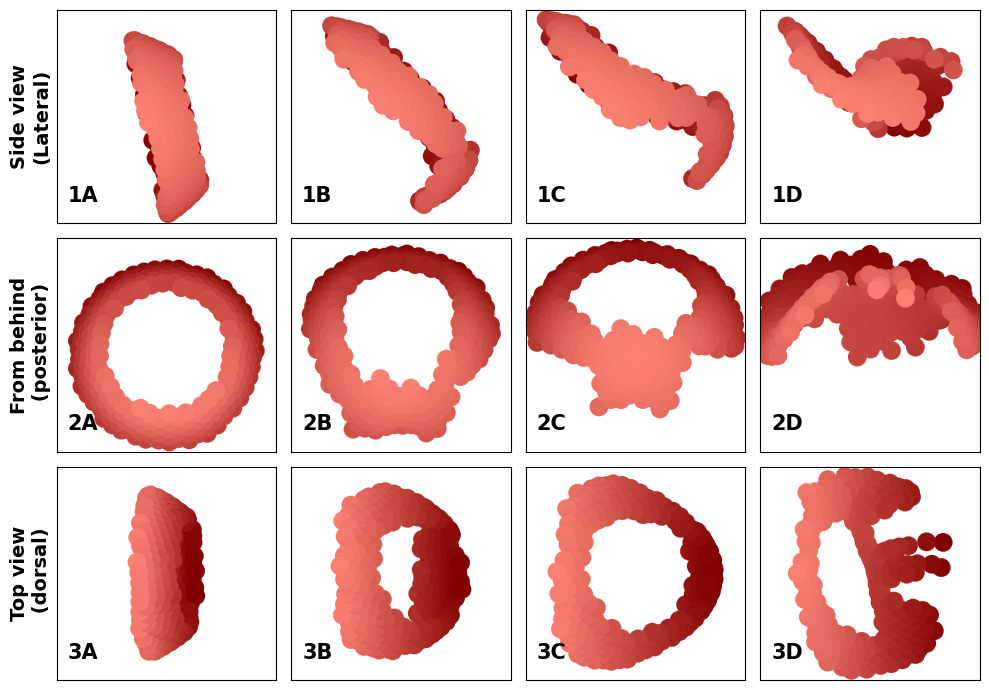

In [20]:
from matplotlib.colors import LinearSegmentedColormap

fig, axs = plt.subplots(3, 4, figsize=(10, 7), tight_layout=True, sharey="row", )

def rotate(p, angle):
    angle = np.radians(angle)
    R = np.array([[1, 0, 0], [0, np.cos(angle), -np.sin(angle)], [0, np.sin(angle), np.cos(angle)]])
    return np.dot(p, R)


xx = poss[0,:,0] 

zz = poss[0,:,2]

s = 45

zz_s = (zz - np.min(zz))/(np.max(zz)- np.min(zz))

d_stripe = (xx > (s - zz_s*10))*(xx < (s+7-zz_s*10))
def tick_to_time(tick):
    return tick/len(poss) * 15 #mins


cmap = LinearSegmentedColormap.from_list('name', ['maroon', 'salmon'])
cmap_r = LinearSegmentedColormap.from_list('name', ['salmon',"maroon"])


ts = [0, 3, 5, 12,]
for i in range(4):
    # T = ts[i]
    p = poss[ts[i]]
    # ABs = AB[T]
    
    # rotate p around the x axis by 0.1 degrees
    # p = rotate(p, 15)
    
    only_pmg = p[p[:, 0] > 15]
    only_pmg = p[d_stripe]


    # sort by their z value
    sort = only_pmg[:, 1].argsort()
    only_pmg = only_pmg[sort]
    axs[0,i].scatter(only_pmg[:, 0], only_pmg[:, 2], c=(only_pmg[:, 1]), cmap=cmap, s = 180, alpha = 1., linewidth=0.1)

    sort = only_pmg[:, 0].argsort()
    only_pmg = only_pmg[sort]
    axs[1,i].scatter(only_pmg[:, 1], only_pmg[:, 2], c=(only_pmg[:, 0]), cmap=cmap, s = 180, alpha = 1., linewidth=0.1)


    sort = only_pmg[:, 2].argsort()
    only_pmg = only_pmg[sort]
    axs[2,i].scatter(only_pmg[:, 0], only_pmg[:, 1], c=(only_pmg[:, 0]), cmap=cmap_r, s = 180, alpha = 1., linewidth=0.1)


    # print(properties.shape, p.shape)
    # pole = p[properties == 4]
    # ABs = ABs[properties == 4]
    # ABs = ABs[pole[:,2].argsort()]
    # pole = pole[pole[:,2].argsort()]

    # axs[i].scatter(pole[:, 0] + 2.*ABs[:,0], pole[:, 1]+ 2.*ABs[:,1], c = "midnightblue", s = 10, alpha = 0.1)

    axs[0,i].axis("equal")
    axs[1,i].axis("equal")
    axs[2,i].axis("equal")

    if i == 0:
        views = ["Side view\n(Lateral)", "From behind\n (posterior)", "Top view\n (dorsal)"]
        for v in range(3):
            axs[v,i].set_ylabel(views[v], fontsize=14, fontweight="bold")
    axs[0,i].set_xlabel("")
    # axs[0,i].set_title(f"t = {tick_to_time(T):.2f} min.", fontsize=15, fontweight="bold")
    # remove ticks
    axs[0,i].set_xticks([])
    axs[0,i].set_yticks([])
    axs[1,i].set_yticks([])
    axs[2,i].set_yticks([])
    axs[1,i].set_xticks([])
    axs[2,i].set_xticks([])

    axs[1,i].set_xlabel("")


    letters = ["A", "B", "C", "D"]
    axs[0,i].text(0.05, 0.1, "1" + letters[i], fontsize=15, fontweight="bold", transform=axs[0,i].transAxes)
    axs[1,i].text(0.05, 0.1, "2" + letters[i], fontsize=15, fontweight="bold", transform=axs[1,i].transAxes)
    axs[2,i].text(0.05, 0.1, "3" + letters[i], fontsize=15, fontweight="bold", transform=axs[2,i].transAxes)

    

In [33]:
xx = poss[0,:,0] 

zz = poss[0,:,2]
s = 48
zz_s = (zz - np.min(zz))/(np.max(zz)- np.min(zz))

d_stripe = (xx > (s - zz_s*15))*(xx < (s+6-zz_s*15))

(-76.01817741394044, 58.52177085876465, -25.642194175720213, 25.66101207733154)

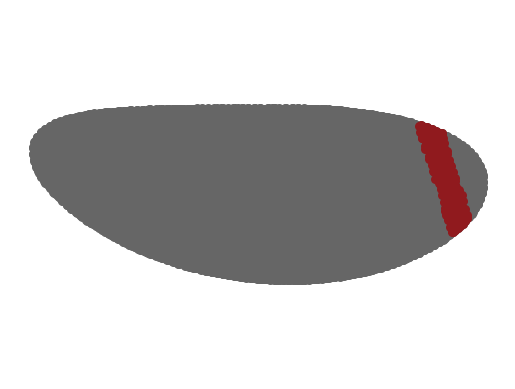

In [35]:
plt.scatter(xx, zz, c="#666666", s = 30)
plt.scatter(xx[d_stripe], zz[d_stripe], c="#901A1E", s = 30)
plt.axis("equal")
plt.axis("off")